<div style="text-align: center;">
    <h1> <font style="bold"> Agent-Based Model </font></h1>
    <h2><font style="bold"> General Paz </font></h2>
    <h3><font style="bold">Integrantes:</font></h3>
</div>
<div style="display: flex; justify-content: center;">
    <h4><ul>
        <li>Noguera Azul</li>
        <li>Gonzalez Rocio</li>
        <li>Guledjian Patricio</li>
        </ul>
    </h4>
</div>

## Descripción del modelo

### Objetivo

Nuestro objetivo es implementar una simulación realista de la Avenida General Paz. En los tramos de Liniers a Lugones. 

### Entidades / Agentes

Las entidades del modelo, qué serán los qué circulen por él. En nuestro modelo corresponden a los automóviles con sus respectivos conductores. Los agentes son autónomos, es decir, están dotados con comportamientos que les permiten tomar decisiones independientes.

### Atributos

Las entidades tienen distintos atributos que lo describen como:

- Posición 
- Longitud del auto
- Velocidad 
- Velocidad deseada  
- Tiempo de permanencia en la autopista 
- Tiempo de reacción de frenado 
- Tiempo en el que el Agente arribó a la Gral. Paz. 

##### Interacción con otros agentes
Cada agente puede tener un vehiculo por detras o por delante, o ambos. El vehiculo de adelante influirá en la variación de velocidad del agente. Las reducciones de velocidad ayudarán a causar los *shockwaves*. 

- Distancia entre vehículo de atras **(ba)**.
- Distancia entre vehiculo de adelante **(fa)**. 

##### Comportamiento
- Los agentes reaccionan (mantienen su velocidad, aceleran, desaceleran y frenan) dependiendo de sus atributos del ambiente y su vecindario. 


### Ambiente

El ambiente de nuestro agent-based transportation model será la infraestructura y capacidades de los nodos y enlaces de la red vial (General Paz). En estas capacidades se crean efectos de congestión (velocidades de viaje reducidas) limitando el número de agentes que se desplazan a través de la red de transporte en un momento dado.

### Variables de Decisión

Las variables de decisión son las qué generarán distintas alternativas o escenarios en el modelo. Es decir, estas serán las qué ayudarán a determinar cuál es el layout óptimo para la solución. 

Nosotros planteamos la **Hipótesis** siguiente:
- *A mayor cantidad de autos autónomos, menor será la probabilidad de choques y menor el tiempo total de los agentes en recorrer la Gral. Paz*

La variable de decisión principal será entonces el porcentaje de autos autónomos en la avenida. 

### Variables de Referencia

Las variables de referencia son las obtenidas cómo resultado de la simulación. Se buscará mejorarlas en función al objetivo.
Tiempo promedio de recorrido de los vehículos.

### Distribuciones

#### Distribución de arribos de vehiculos

Optado por la utilización de una *distribución exponencial* como modelo para representar los arribos de vehículos, y esta elección se fundamenta en diversas consideraciones clave.

La distribución exponencial negativa es una selección frecuentemente empleada en la modelación de procesos de llegada aleatoria. En el contexto de rutas de vehículos, esta distribución se ajusta adecuadamente cuando se asume que los arribos de vehículos son eventos independientes y se producen a una tasa constante a lo largo del tiempo. En otras palabras, la probabilidad de que un vehículo llegue en un periodo determinado es constante y no depende del momento en que llegaron los vehículos previos.

Sin embargo, es fundamental destacar que emplearemos parámetros diferentes para la distribución, dependiendo de la franja horaria en la que nos encontremos, ya sea durante las horas pico o en otros momentos del día.

La distribución que elegiremos para modelar los arribos será la siguiente:
$$f(x | \lambda) = e^{(-\lambda x)}$$

$$
\lambda =
\begin{cases}
\frac{1}{\mu_1} = 3 \text{s} \, & \text{si es hora pico} \\
\frac{1}{\mu_2} = 10 \text{s}, & \text{si no es hora pico}
\end{cases}
$$

#### Distribución de velocidad de arribos


Para modelar la velocidad de llegada de los agentes a la autopista, se optó por emplear una *distribución normal* con una media de 17 m/s (60 K/h) y una varianza de 1 m/s (3.6 k/h). Esta elección se basa en la búsqueda de un enfoque realista y equilibrado en la simulación.

La elección de una velocidad de llegada no extrema como media tiene como objetivo representar un escenario inicial donde los agentes ingresan gradualmente a la autopista, permitiéndoles adaptarse a las condiciones simuladas de tráfico. Esta aproximación evita situaciones iniciales de alta congestión que podrían resultar en colisiones debido a la falta de adaptación de los agentes.

Por otro lado, la selección de una varianza pequeña contribuye a limitar la dispersión en las velocidades de llegada de los agentes, lo que ayuda a mantener una transición más suave durante el proceso de entrada a la autopista. En resumen, esta elección busca proporcionar una base sólida para la simulación al garantizar que los agentes comiencen con velocidades razonables y converjan gradualmente hacia las condiciones de tráfico simuladas.

En consecuencia, el uso de una distribución normal con estos parámetros se considera adecuado para establecer una entrada controlada y realista de los agentes en la simulación, minimizando la probabilidad de choques provocados por discrepancias iniciales en las velocidades de los vehículos.


$$
f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$

$$
\begin{align*}
\mu & = 17m/s \\
\sigma & = 1m/s
\end{align*}
$$

#### Distribución de velocidad deseada

La distribución triangular es una elección adecuada para simular la velocidad deseada de los agentes en una ruta con un mínimo de 8.34m/s (30 km/h), una moda de 19.45m/s (70 km/h) y un máximo de 27.78m/s (100 km/h) por lo siguiente:

Es una distribución continua que permite modelar situaciones en las que existe un valor mínimo, un valor máximo y un valor modal. En el contexto de la velocidad deseada de los vehiculos en una carretera, es razonable suponer que la mayoría de los vehiculos desearán moverse a una velocidad cercana a la moda (70 km/h) y que habrá algunos que desearan ir más rápido o más lento. 

se optó por emplear esta distribución para que los agentes busquen satisfacer su deseo de acercarse a su velocidad deseada en cada instante de tiempo mientras sea posible. 



$$
f(x) = \begin{cases}
0 & \text{si } x < 30 \\
\\
\frac{2(x-30)}{(70-30)(100-30)} & \text{si } 30 \leq x < 70 \\
\\
\frac{2(70-x)}{(70-30)(70-100)} & \text{si } 100 \leq x \leq 70 \\
\\
0 & \text{si } x > 100
\end{cases}
$$

#### Distribución de variación de velocidad

En nuestra simulación de la Gral. Paz, cada agente se comporta de manera única y puede variar en su velocidad debido a diferentes factores, como la relación con otros agentes y las condiciones del entorno. Para modelar la velocidad, inicialmente utilizamos la distribución triangular, que nos proporciona una velocidad deseada para cada agente.

Sin embargo, sabemos que los agentes no podrán mantener su velocidad deseada constantemente, ya que su velocidad se verá afectada de acuerdo con la situción. Para capturar esta variabilidad en la velocidad y simular la tendencia a aproximarse a la velocidad deseada, utilizamos una distribución normal.

Aumentará o disminuyerá la velocidad depenediendo de la diferencia entre la velocidad deseada y la actual. 
- si la velocidad deseada se encuentra por debajo de la velocidad actual, el agente (si el contexto lo permite) reducirá su velocidad.
- si la velocidad deseada se encuentra por arriba de la velocidad actual, el agente (si el contexto lo permite) aumentará su velocidad. 

Es importante destacar las siguientes cosas:
- A la diferencia de velocidades (deseada y actual) se la multiplica por un valor pequeño ($\alpha$) para que las variaciones sean coherentes con las velocidades de frenado de los seres humanos.

$$
f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$

$$
\begin{align*}
\mu & = \text{ diferencia entre velocidad deseada y velocidad actual} * \alpha, \\
\sigma & = 1 \text{ km/h} \text{ (varianza)}.
\end{align*}
$$

#### Distribución de frenado

Sabemos que para que un agente logre frenar sin colisionar debe reducir su velocidad  como minimo a la de el agente de adelante. Sin embargo modelar la distribución de frenado de esta forma no se ajusta a la realidad debido a que los agentes son unicos e independientes, por lo que tienen distintos tiempos de reacción, distintas velocidades y distintas velocidades deseadas. 

Por este motivo, decidimos agregarle un factor aleatoreo que se amolde a las propiedades de cada agente.

Elegimos la *distribución exponencial* como medida de error de la reducción necesaria para evitar colisiones. Esto se debe a varias razones fundamentales:

- **Falta de Memoria a Largo Plazo:** Esta propiedad implica que la probabilidad de que un vehículo frene con fuerza en un momento dado no depende de cuánto tiempo haya transcurrido desde el último frenado. 

- **Ajuste de la "Agresividad" del Frenado:** La distribución exponencial nos brinda la flexibilidad de ajustar el grado de "agresividad" en el frenado de los vehículos a través del parámetro de tasa (λ). Al variar el valor de λ, podemos modelar diferentes comportamientos de frenado. Un valor más alto de λ indica que los vehículos son menos propensos a frenar con fuerza cuando están cerca del vehículo de adelante, lo que podría representar situaciones de tráfico más fluidas. Por otro lado, un valor más bajo de λ indica una mayor probabilidad de frenado en distancias cercanas, lo que podría reflejar situaciones de tráfico más congestionadas o conductores más cautelosos.


##### Formula de reducción:
  
$$\text{Reducción} = \frac{\text{velocidad del agente de adelante} - \text{velocidad del agente de atrás}}{1 - e^{(\lambda x)}}$$

##### Pero, ¿Que significa el $\lambda$?

Este parametro es el tiempo de reacción de el agente. A continuación explicaremos la distribución que utilizamos para el tiempo de reacción.


#### Distribución del tiempo de reacción del agente

Elegimos la *distribución normal* para simular el tiempo de reacción debido a su capacidad para representar la variabilidad realista en los tiempos de reacción de las personas al frenar. La distribución normal se ajusta bien a situaciones en las que la mayoría de los individuos tienen tiempos de reacción cercanos a un valor promedio (la media), con menos personas que experimentan tiempos de reacción significativamente más cortos o más largos. Esto refleja con precisión cómo la mayoría de las personas conducen con tiempos de reacción similares, pero aún existe variabilidad natural. 

Luego de una busqueda de estudios de investigación acerca del comportamiento de los conductores en carreteras, llegamos a la conclusión que el tiempo de reacción promedio de estimulos visuales es de aproximadamente *0.25*. Este puede variar dependiendo la edad, la estatura (los estímulos en las personas altas tienen que recorrer mayor distancia en el sistema nervioso), las enfermedades, el alcohol, las drogas, el cansancio, algunos medicamentos, las condiciones climatológicas, el estrés, etc. Se adjunta a continuación la pagina que tomamos de referencia:

https://sites.google.com/a/iesmonreal.es/kronosferia/3eso/tiempo-de-reaccion

Por otro lado, se decidió por un desvio pequeño ya que las diferencias de los tiempos de reacción entre los agentes es demasiado pequeña en unidad de segundo. 

$$
f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$

$$
\begin{align*}
\mu & = 0.25s \\
\sigma & = 0.005s
\end{align*}
$$


## Simulación

In [410]:
import random 
from typing import Optional
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd

import pygame
import sys

import os

In [411]:
# Define la carpeta donde se encuentran las imágenes de los agentes
agent_images_folder = "vehiculos"

# Lista de nombres de las imágenes que se asignarán a los agentes de manera uniforme
agent_image_names_agent = ["rojo.png", "gris.png", "negro.png"]
agent_image_names_intelligent = ["blue.png"]

In [412]:
class Agent(pygame.sprite.Sprite):

    def __init__(self):
        super().__init__()
        self.position = 0                                                                               
        self.length = 40                                              
        self.front_agent = None                                      
        self.back_agent = None                                       
        self.collision = False                                        
        self.desired_velocity = random.triangular(30/3.6, 100/3.6, 70/3.6)
        self.velocity = random.normalvariate(60/3.6, 1)
        self.time = 0
        self.arrival_time = 0
        self.reaction_time = random.normalvariate(0.15, 0.005) 
        self.stopping = 0
        self.image = None

        # Asignar una de las imágenes uniformemente
        image_name = random.choice(agent_image_names_agent)
        self.load_agent_image(image_name)

    def load_agent_image(self, image_name):
        # Construir la ruta completa de la imagen
        image_path = os.path.join(agent_images_folder, image_name)

        # Cargar y ajustar la imagen
        self.image = pygame.image.load(image_path)
        self.image = pygame.transform.scale(self.image, (self.length, 20))

    
    def __str__(self):
        return (
            f"Agent(t={self.time}, at={self.arrival_time}, x={self.position}, "
            f"v={self.velocity}, vd={self.desired_velocity})"
        )

    def dist_to_front_agent(self):
        if self.front_agent == None:
            return None

        else: #hay otro agente adelante
            return  self.front_agent.position - self.position - self.length


    def dist_to_back_agent(self):
        if self.back_agent == None:
            return None

        else: #hay otro agent atras
            return  self.position - self.back_agent.position - self.back_agent.length

    def speed_variation(self):
        # voy a querer acelerar/desacelerar dependiendo de mi velocidad deseada siempre y cuando tenga lugar para hacerlo
        if self.dist_to_front_agent() is not None:

            # quiero acelerar
            if self.velocity < self.desired_velocity:

                if self.dist_to_front_agent() / (self.velocity) >= 4:
                    acceleration = random.normalvariate((self.desired_velocity - self.velocity) * 1/2, 1)

                    if acceleration > 4:
                        acceleration == 4
                    self.velocity += acceleration
            
            # quiero desacelerar
            if self.velocity > self.desired_velocity and self.stopping == 0:
                if self.dist_to_front_agent() / (self.velocity) >= 5:
                    self.velocity += random.normalvariate((self.desired_velocity - self.velocity) * 1/3, 1)


        # si no tengo agente adelante, variara mi velocidad hasta mi la deseada
        if self.dist_to_front_agent() is None:
            self.velocity += random.normalvariate((self.desired_velocity - self.velocity) * 1/3, 1)

        
    def reduce_speed(self):
        # si se encuentra "cerca" del agente de adelante, reducirá su velocidad mediante una distribución exponencial con media 1.
        if self.dist_to_front_agent() is not None and self.dist_to_front_agent() / (self.velocity - self.front_agent.velocity) < 1:   
            if self.front_agent.velocity < self.velocity:
                reduction = (self.front_agent.velocity - self.velocity) /(1 - stats.expon.rvs(scale=self.reaction_time))

                # verificamos que sea una reducción posible para un agente humano. 
                if reduction < -4:
                    #Imposible que frene un humano
                    self.collision = True
                    self.stopping = 0
                    print('collision')
                    
                else:
                    self.velocity += reduction
                    self.stopping += 1

        elif self.dist_to_front_agent() is not None and self.dist_to_front_agent() / (self.velocity - self.front_agent.velocity) < 5 and self.dist_to_front_agent() / (self.velocity - self.front_agent.velocity) >= 1 or self.stopping > 0 :   
            if self.dist_to_front_agent() is not None and self.front_agent.velocity < self.velocity:
                reduction = (self.front_agent.velocity - self.velocity) / (2 - stats.expon.rvs(scale=self.reaction_time))

                self.velocity += reduction
                
                self.stopping += 1    
                if self.stopping == 5 or self.velocity == 0.01:
                    self.stopping = 0
    
        if self.velocity < 0.01:
            self.velocity = 0.01   
            
    def move(self):
        self.position = self.position + self.velocity * 1 
    
    def get_position(self):
        return self.position

    def update(self):
        self.move()
        self.reduce_speed()
        self.speed_variation()

        self.time += 1

In [413]:
class IntelligentCar(pygame.sprite.Sprite):

    def __init__(self):
        super().__init__()
        self.position = 0
        self.length = 40
        self.front_agent = None
        self.back_agent = None
        self.collision = False
        self.desired_velocity = 80/3.6
        self.velocity = random.normalvariate(60/3.6, 1)
        self.time = 0
        self.arrival_time = 0
        self.image = None

        # Asignar una de las imágenes uniformemente
        image_name = random.choice(agent_image_names_intelligent)
        self.load_agent_image(image_name)

    def load_agent_image(self, image_name):
        # Construir la ruta completa de la imagen
        image_path = os.path.join(agent_images_folder, image_name)

        # Cargar y ajustar la imagen
        self.image = pygame.image.load(image_path)
        self.image = pygame.transform.scale(self.image, (self.length, 20))

    def __str__(self):
        return (
            f"IntelligentCar(t={self.time}, at={self.arrival_time}, x={self.position}, "
            f"v={self.velocity}, vd={self.desired_velocity})"
        )

    def dist_to_front_agent(self):
        if self.front_agent is None:
            return None
        else:
            return abs(self.position - self.front_agent.position + self.length) + 10

    def dist_to_back_agent(self):
        if self.back_agent is None:
            return None
        else:
            return abs(self.back_agent.position - self.position + self.back_agent.length) + 10

    def adjust_speed(self):
        # Calcula la velocidad deseada en función de la distancia con el automóvil de adelante y atrás
        safe_distance = 10  # Distancia segura deseada entre vehículos en metros
        min_following_distance = 5  # Distancia mínima de seguimiento en metros

        # Calcular la velocidad deseada en función de la distancia con el automóvil de adelante
        if self.dist_to_front_agent() is not None:
            desired_velocity_front = min(self.desired_velocity,(self.dist_to_front_agent() - safe_distance))
        else:
            desired_velocity_front = self.desired_velocity

        # Calcular la velocidad deseada en función de la distancia con el automóvil de atrás
        if self.dist_to_back_agent() is not None:
            desired_velocity_back = min(self.desired_velocity, (self.dist_to_back_agent() - min_following_distance))
        else:
            desired_velocity_back = self.desired_velocity

        # Ajustar la velocidad deseada en función de ambas distancias
        if desired_velocity_front < desired_velocity_back:
            self.velocity = max(desired_velocity_front, 0)
        else:
            self.velocity = max(desired_velocity_back, 0)

    def move(self):
        self.position += self.velocity * 1

    def get_position(self):
        return self.position

    def update(self):
        self.move()
        self.adjust_speed()
        self.time += 1

In [414]:
class Road:
    
    def __init__(self, m:int, c:bool, p:float):
        self.km = m
        self.agents = []
        self.time = 0
        self.total_time = 3600
        self.congestion = c
        self.collision_count = 0
        self.trip_time = []
        self.agent_velocities = {}
        self.prop_agents = (1 - p)
        self.prop_int_agents = p

    def add_agent(self):
        
        # Seleccionamos el tipo de agente a agregar, con una probabilidad de p de que sea un IntelligentCar y 1 - p de que sea un Agent
        agent_type = random.choices([IntelligentCar, Agent], weights=[self.prop_int_agents, self.prop_agents])[0]
        new_agent = agent_type()
        
        if not self.agents:
            self.agents.append(new_agent)
            # print("Primer agente agregado: " + str(self.agents[0]))
            if self.congestion == True:
                # Agrega autos con distribución exponencial negativa con media = 3
                self.time_to_next_arrival = stats.expon.rvs(scale=3)
            else: 
                # Agrega autos con distribución exponencial negativa con media = 10
                self.time_to_next_arrival = stats.expon.rvs(scale=10)

        else:
            # Verificamos el tiempo desde el último agente
            if self.time - self.agents[-1].arrival_time > self.time_to_next_arrival and self.agents[-1].position > 80:
                # Agregamos un nuevo agente a la lista
                self.agents.append(new_agent)
                
                new_agent.arrival_time = self.time

                if self.congestion == True:
                    # Agrega autos con distribución exponencial negativa con media = 3
                    self.time_to_next_arrival = stats.expon.rvs(scale=3)
                    
                else: 
                    # Agrega autos con distribución exponencial negativa con media = 10
                    self.time_to_next_arrival = stats.expon.rvs(scale=10)

                # Configuramos el front y back car para el nuevo agente
                if len(self.agents) >= 2:
                    position_new_agent = self.agents.index(new_agent)
                    new_agent.front_agent = self.agents[position_new_agent - 1]
                    self.agents[position_new_agent - 1].back_agent = new_agent
                    
        # Agregamos la velocidad del agente a la lista de velocidades
        self.agent_velocities[new_agent.arrival_time] = []

        self.update_road()
    
    def update_road(self):
        self.time += 1
        # print("Tiempo:", self.time)
        removed = set()
        for agent in self.agents:
            agent.update()
            # print("Agente:", self.agents.index(agent), "->", agent)
            self.agent_velocities[agent.arrival_time].append(agent.velocity)

            #Si el agente llega al final de la carretera lo eliminamos
            if agent.position > self.km:
                self.trip_time.append(agent.time)
                removed.add(agent)

            #Reasignamos el front y back car de los agentes extremos de la lista
            if len(self.agents) > 0:
                self.agents[0].front_agent = None

            if agent.collision == True:
                removed.add(agent)
                removed.add(agent.front_agent)
                self.collision_count += 1

        # reasingo la posiciones de la lista
        for agent in removed:
            # Si hay choque lo eliminamos y reasignamos los front y back car
            self.agents.remove(agent)
        
        for agent in self.agents:
            if self.agents.index(agent) != 0:
                        agent.front_agent = self.agents[self.agents.index(agent) - 1]
            else:
                agent.front_agent = None
                
            if self.agents.index(agent) != (len(self.agents) - 1):
                agent.back_agent = self.agents[self.agents.index(agent) + 1]
            else:
                agent.back_agent = None


In [415]:
import pygame
import sys

# Inicializar Pygame
pygame.init()

# Configuración de la ventana
width, height = 1000, 100
screen = pygame.display.set_mode((width, height))
pygame.display.set_caption("Avenida General Paz")

# Colores
white = (255, 255, 255)
gray = (200, 200, 200)
green = (0, 150, 0)
black = (0, 0, 0)
red = (255, 0, 0)

# Registro del tiempo de inicio
start_time = pygame.time.get_ticks()

# Lista para almacenar los tiempos de viaje
trip_time_list = []
agent_velocities = {}
reduccion_de_velocidad = []

# Crear una carretera (supongo que la variable 'road' es previamente definida)
general_paz = Road(m=17000, c=True, p=0)

delay = 50  # Milisegundos de retraso entre fotogramas (ajusta según sea necesario)

# Pausa inicial antes de agregar agentes
initial_pause_time = 2000  # Tiempo en milisegundos (1 segundo)
pygame.time.delay(initial_pause_time)

# Bucle principal
running = True
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

    if general_paz.time < general_paz.total_time:
        # Actualizar la carretera y los agentes en cada iteración
        general_paz.add_agent() 
        
        # Agregar el tiempo de viaje de los agentes que llegan al final de la autopista a la lista
        trip_time_list.extend(general_paz.trip_time)
        general_paz.trip_time = []  # Limpiar la lista de tiempos para la próxima iteración

        # Crear un nuevo DataFrame con los tiempos de viaje en esta iteración
        trip_time_df = pd.DataFrame({'Time': trip_time_list})
        trip_time_df.to_csv('./data/trip_times.csv', index=False)
        
        for agent in general_paz.agents:
            if agent.arrival_time not in agent_velocities:
                agent_velocities[agent.arrival_time] = []
            agent_velocities[agent.arrival_time].append(agent.velocity)

        # Crear el DataFrame a partir del diccionario
        agent_velocities_df = pd.DataFrame.from_dict(agent_velocities, orient='index')

        # Resetear los índices y renombrar la columna de "arrival times" (puedes cambiar el nombre según sea necesario)
        agent_velocities_df.reset_index(inplace=True)
        agent_velocities_df.rename(columns={'index': 'ArrivalTime'}, inplace=True)
        if general_paz.congestion == True:
            agent_velocities_df.to_csv('./data/agent_velocities.csv', index=False)
        else:
            agent_velocities_df.to_csv('./data/agent_velocities_without_congestion.csv', index=False)
        

    # Dibujar el pasto verde arriba de la carretera
    pygame.draw.rect(screen, green, (0, 0, width, height // 3))

    # Carretera gris
    pygame.draw.rect(screen, gray, (0, height // 3, width, height // 3))

    # Dibujar el pasto verde abajo de la carretera
    pygame.draw.rect(screen, green, (0, 2 * height // 3, width, height // 3))

    # Líneas blancas en el medio de la carretera
    line_width = 10
    line_height = 5
    num_lines = 30
    gap = width // (num_lines + 1)
    for i in range(num_lines):
        x = (i + 1) * gap - line_width // 2
        pygame.draw.rect(screen, white, (x, height // 2 - line_height // 2, line_width, line_height))

    # Dibujar los agentes en la carretera
    for agent in general_paz.agents:
        # Si el agente tiene una imagen, dibújala en lugar de un rectángulo
        screen.blit(agent.image, (agent.get_position(), height // 2.5))

    # Calcular el tiempo transcurrido en segundos
    current_time = pygame.time.get_ticks()
    elapsed_time_seconds = (current_time - start_time) / 1000  # Convierte a segundos

    # Mostrar el tiempo transcurrido en la ventana
    # display_elapsed_time(screen, elapsed_time_seconds)

    pygame.display.flip()

    # Agregar un retraso para ralentizar la simulación
    pygame.time.delay(delay)

# Salir del juego
pygame.quit()
sys.exit()

/var/folders/9x/tdz37svs2n33397zbw458q3w0000gn/T/ipykernel_16056/2090237249.py:79: RuntimeWarning: divide by zero encountered in double_scalars
  if self.dist_to_front_agent() is not None and self.dist_to_front_agent() / (self.velocity - self.front_agent.velocity) < 1:
/var/folders/9x/tdz37svs2n33397zbw458q3w0000gn/T/ipykernel_16056/2090237249.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  elif self.dist_to_front_agent() is not None and self.dist_to_front_agent() / (self.velocity - self.front_agent.velocity) < 5 and self.dist_to_front_agent() / (self.velocity - self.front_agent.velocity) >= 1 or self.stopping > 0 :
/var/folders/9x/tdz37svs2n33397zbw458q3w0000gn/T/ipykernel_16056/2090237249.py:79: RuntimeWarning: divide by zero encountered in double_scalars
  if self.dist_to_front_agent() is not None and self.dist_to_front_agent() / (self.velocity - self.front_agent.velocity) < 1:
/var/folders/9x/tdz37svs2n33397zbw458q3w0000gn/T/ipykernel_16056/2090237249.py:94: R

collision


/var/folders/9x/tdz37svs2n33397zbw458q3w0000gn/T/ipykernel_16056/2090237249.py:79: RuntimeWarning: divide by zero encountered in double_scalars
  if self.dist_to_front_agent() is not None and self.dist_to_front_agent() / (self.velocity - self.front_agent.velocity) < 1:
/var/folders/9x/tdz37svs2n33397zbw458q3w0000gn/T/ipykernel_16056/2090237249.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  elif self.dist_to_front_agent() is not None and self.dist_to_front_agent() / (self.velocity - self.front_agent.velocity) < 5 and self.dist_to_front_agent() / (self.velocity - self.front_agent.velocity) >= 1 or self.stopping > 0 :
/var/folders/9x/tdz37svs2n33397zbw458q3w0000gn/T/ipykernel_16056/2090237249.py:79: RuntimeWarning: divide by zero encountered in double_scalars
  if self.dist_to_front_agent() is not None and self.dist_to_front_agent() / (self.velocity - self.front_agent.velocity) < 1:
/var/folders/9x/tdz37svs2n33397zbw458q3w0000gn/T/ipykernel_16056/2090237249.py:94: R

collision


/var/folders/9x/tdz37svs2n33397zbw458q3w0000gn/T/ipykernel_16056/2090237249.py:79: RuntimeWarning: divide by zero encountered in double_scalars
  if self.dist_to_front_agent() is not None and self.dist_to_front_agent() / (self.velocity - self.front_agent.velocity) < 1:
/var/folders/9x/tdz37svs2n33397zbw458q3w0000gn/T/ipykernel_16056/2090237249.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  elif self.dist_to_front_agent() is not None and self.dist_to_front_agent() / (self.velocity - self.front_agent.velocity) < 5 and self.dist_to_front_agent() / (self.velocity - self.front_agent.velocity) >= 1 or self.stopping > 0 :


collision


/var/folders/9x/tdz37svs2n33397zbw458q3w0000gn/T/ipykernel_16056/2090237249.py:79: RuntimeWarning: divide by zero encountered in double_scalars
  if self.dist_to_front_agent() is not None and self.dist_to_front_agent() / (self.velocity - self.front_agent.velocity) < 1:
/var/folders/9x/tdz37svs2n33397zbw458q3w0000gn/T/ipykernel_16056/2090237249.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  elif self.dist_to_front_agent() is not None and self.dist_to_front_agent() / (self.velocity - self.front_agent.velocity) < 5 and self.dist_to_front_agent() / (self.velocity - self.front_agent.velocity) >= 1 or self.stopping > 0 :
/var/folders/9x/tdz37svs2n33397zbw458q3w0000gn/T/ipykernel_16056/2090237249.py:79: RuntimeWarning: divide by zero encountered in double_scalars
  if self.dist_to_front_agent() is not None and self.dist_to_front_agent() / (self.velocity - self.front_agent.velocity) < 1:
/var/folders/9x/tdz37svs2n33397zbw458q3w0000gn/T/ipykernel_16056/2090237249.py:94: R

collision


/var/folders/9x/tdz37svs2n33397zbw458q3w0000gn/T/ipykernel_16056/2090237249.py:79: RuntimeWarning: divide by zero encountered in double_scalars
  if self.dist_to_front_agent() is not None and self.dist_to_front_agent() / (self.velocity - self.front_agent.velocity) < 1:
/var/folders/9x/tdz37svs2n33397zbw458q3w0000gn/T/ipykernel_16056/2090237249.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  elif self.dist_to_front_agent() is not None and self.dist_to_front_agent() / (self.velocity - self.front_agent.velocity) < 5 and self.dist_to_front_agent() / (self.velocity - self.front_agent.velocity) >= 1 or self.stopping > 0 :
/var/folders/9x/tdz37svs2n33397zbw458q3w0000gn/T/ipykernel_16056/2090237249.py:79: RuntimeWarning: divide by zero encountered in double_scalars
  if self.dist_to_front_agent() is not None and self.dist_to_front_agent() / (self.velocity - self.front_agent.velocity) < 1:
/var/folders/9x/tdz37svs2n33397zbw458q3w0000gn/T/ipykernel_16056/2090237249.py:94: R

collision
collision


/var/folders/9x/tdz37svs2n33397zbw458q3w0000gn/T/ipykernel_16056/2090237249.py:79: RuntimeWarning: divide by zero encountered in double_scalars
  if self.dist_to_front_agent() is not None and self.dist_to_front_agent() / (self.velocity - self.front_agent.velocity) < 1:
/var/folders/9x/tdz37svs2n33397zbw458q3w0000gn/T/ipykernel_16056/2090237249.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  elif self.dist_to_front_agent() is not None and self.dist_to_front_agent() / (self.velocity - self.front_agent.velocity) < 5 and self.dist_to_front_agent() / (self.velocity - self.front_agent.velocity) >= 1 or self.stopping > 0 :
/var/folders/9x/tdz37svs2n33397zbw458q3w0000gn/T/ipykernel_16056/2090237249.py:79: RuntimeWarning: divide by zero encountered in double_scalars
  if self.dist_to_front_agent() is not None and self.dist_to_front_agent() / (self.velocity - self.front_agent.velocity) < 1:
/var/folders/9x/tdz37svs2n33397zbw458q3w0000gn/T/ipykernel_16056/2090237249.py:94: R

KeyboardInterrupt: 

## Análisis y Resultados

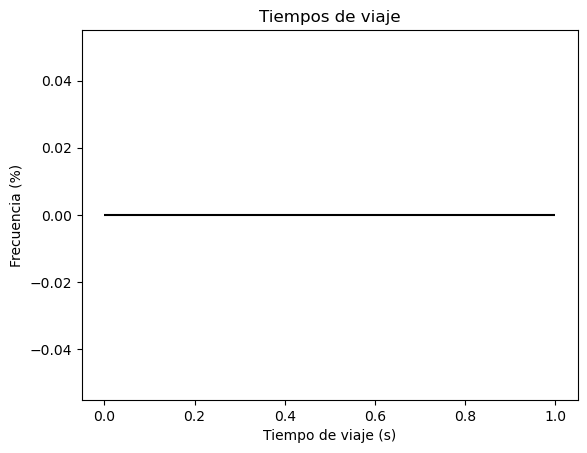

In [ ]:
trip_times = pd.read_csv('./data/trip_times.csv')

plt.hist(trip_times['Time'], bins=10, color='#83A5CE', edgecolor='black', linewidth=1.5)
plt.xlabel('Tiempo de viaje (s)')
plt.ylabel('Frecuencia (%)')
plt.title('Tiempos de viaje')

plt.show()

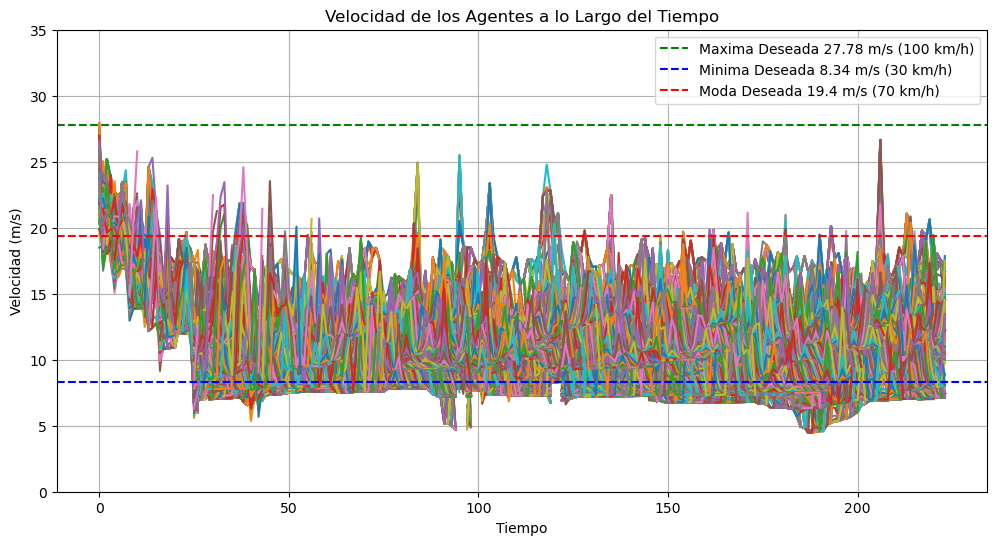

In [416]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV con los datos de velocidad de los agentes
df = pd.read_csv('./data/agent_velocities.csv')

# Eliminar la columna de ArrivalTime si no la necesitas en el gráfico
df = df.drop(columns=['ArrivalTime'])

# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))  # Ajusta el tamaño del gráfico según tus preferencias

# Iterar a través de las columnas del DataFrame y trazar una línea para cada agente
for column in df.columns:
    plt.plot(df.index, df[column], label=None)  # No se incluyen etiquetas para las líneas de los agentes

# Agregar una línea punteada en y = 27.78 (máxima deseada)
plt.axhline(y=27.78, color='green', linestyle='--', label='Maxima Deseada 27.78 m/s (100 km/h)')

# Agregar una línea punteada en y = 8.34 (mínima deseada)
plt.axhline(y=8.34, color='blue', linestyle='--', label='Minima Deseada 8.34 m/s (30 km/h)')

# Agregar una línea punteada en y = 8.34 (mínima deseada)
plt.axhline(y=19.4, color='red', linestyle='--', label='Moda Deseada 19.4 m/s (70 km/h)')

# Configurar etiquetas y leyenda
plt.xlabel('Tiempo')
plt.ylabel('Velocidad (m/s)')
plt.title('Velocidad de los Agentes a lo Largo del Tiempo')
plt.ylim(0, 35)

# Mostrar el gráfico
plt.grid()

# Mostrar solo la leyenda para las líneas punteadas máxima y mínima
plt.legend()

plt.show()


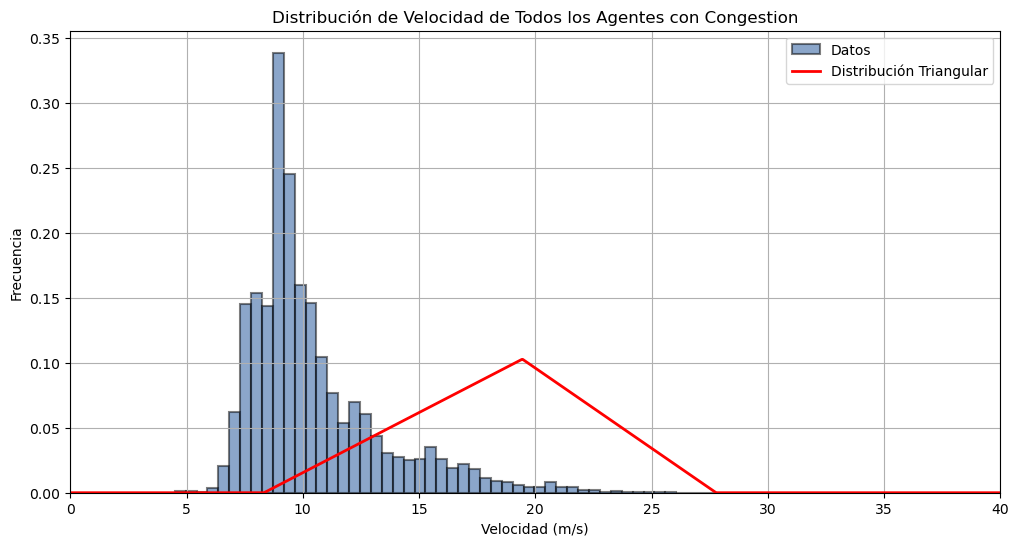

In [417]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import triang

# Cargar el archivo CSV con los datos de velocidad de los agentes
df = pd.read_csv('./data/agent_velocities.csv')

# Eliminar la columna de ArrivalTime si no la necesitas en el gráfico
df = df.drop(columns=['ArrivalTime'])

# Crear un histograma combinado de todas las velocidades
plt.figure(figsize=(12, 6))  # Ajusta el tamaño del gráfico según tus preferencias

# Concatenar todas las velocidades en una sola serie
all_velocities = df.values.flatten()

# Crear el histograma con el color deseado
plt.hist(all_velocities, bins=50, alpha=0.5, color='#194F97', edgecolor='black', density=True, label='Datos', linewidth=1.5)

# Definir los parámetros para la distribución triangular
min_value = 30/3.6
max_value = 100/3.6
mode_value = 70/3.6

# Crear una función de distribución triangular
x = np.linspace(0, 40, 1000)
triangular = triang.pdf(x, c=(mode_value - min_value) / (max_value - min_value), loc=min_value, scale=(max_value - min_value))

# Superponer la función de distribución triangular en el histograma
plt.plot(x, triangular, 'r-', linewidth=2, label='Distribución Triangular')

# Configurar etiquetas y título
plt.xlabel('Velocidad (m/s)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Velocidad de Todos los Agentes con Congestion')

# Establecer el rango en el eje x
plt.xlim(0, 40)

# Agregar una leyenda
plt.legend()

# Mostrar el gráfico
plt.grid()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import triang

# Cargar el archivo CSV con los datos de velocidad de los agentes
df = pd.read_csv('./data/agent_velocities_without_congestion.csv')

# Eliminar la columna de ArrivalTime si no la necesitas en el gráfico
df = df.drop(columns=['ArrivalTime'])

# Crear un histograma combinado de todas las velocidades
plt.figure(figsize=(12, 6))  # Ajusta el tamaño del gráfico según tus preferencias

# Concatenar todas las velocidades en una sola serie
all_velocities = df.values.flatten()

# Crear el histograma
plt.hist(all_velocities, bins=20, alpha=0.5, color='b', edgecolor='black', density=True, label='Datos')

# Definir los parámetros para la distribución triangular
min_value = 30/3.6
max_value = 100/3.6
mode_value = 70/3.6

# Crear una función de distribución triangular
x = np.linspace(0, 40, 1000)
triangular = triang.pdf(x, c=(mode_value - min_value) / (max_value - min_value), loc=min_value, scale=(max_value - min_value))

# Superponer la función de distribución triangular en el histograma
plt.plot(x, triangular, 'r-', linewidth=2, label='Distribución Triangular')

# Configurar etiquetas y título
plt.xlabel('Velocidad (m/s)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Velocidad de Todos los Agentes sin Congestion')

# Establecer el rango en el eje x
plt.xlim(0, 40)

# Agregar una leyenda
plt.legend()

# Mostrar el gráfico
plt.grid()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: './data/agent_velocities_without_congestion.csv'

In [418]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import triang

# Cargar el archivo CSV con los datos de velocidad de los agentes
df_congestion = pd.read_csv('./data/agent_velocities.csv')
df_sin_congestion = pd.read_csv('./data/agent_velocities_without_congestion.csv')

# Eliminar la columna de ArrivalTime si no la necesitas en el gráfico
df_congestion = df_congestion.drop(columns=['ArrivalTime'])
df_sin_congestion = df_sin_congestion.drop(columns=['ArrivalTime'])

# Crear subplots en una fila
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Trazar el histograma con congestión en el primer subplot
axs[0].hist(df_congestion.values.flatten(), bins=50, alpha=0.5, color='#194F97', edgecolor='black', density=True, label='Datos', linewidth=1.5)
axs[0].plot(x, triangular, 'r-', linewidth=2, label='Distribución Triangular')
axs[0].set_xlabel('Velocidad (m/s)')
axs[0].set_ylabel('Frecuencia')
axs[0].set_title('Distribución de Velocidad con Congestión')
axs[0].set_xlim(0, 40)
axs[0].legend()

# Trazar el histograma sin congestión en el segundo subplot
axs[1].hist(df_sin_congestion.values.flatten(), bins=20, alpha=0.5, color='b', edgecolor='black', density=True, label='Datos')
axs[1].plot(x, triangular, 'r-', linewidth=2, label='Distribución Triangular')
axs[1].set_xlabel('Velocidad (m/s)')
axs[1].set_ylabel('Frecuencia')
axs[1].set_title('Distribución de Velocidad sin Congestión')
axs[1].set_xlim(0, 40)
axs[1].legend()

# Ajustar el espacio entre subplots
plt.tight_layout()

# Mostrar los gráficos
plt.grid()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: './data/agent_velocities_without_congestion.csv'

In [419]:
import random
import matplotlib.pyplot as plt

# Importa las clases y funciones necesarias

# Define una función que realiza una simulación con una proporción dada de autos inteligentes
def run_simulation_with_proportion(proportion):
    road = Road(m=17000, c=True, p=proportion)  # Configura la simulación según tus necesidades

    # Inicializa variables para registrar resultados
    cantidad_de_choques = 0

    # Ejecuta la simulación
    while road.time < road.total_time:
        road.add_agent()
        road.update_road()

    # Registra la cantidad de choques
    cantidad_de_choques = road.collision_count

    return cantidad_de_choques

# Ejecuta múltiples simulaciones con diferentes proporciones de autos inteligentes
proportions = [0.1, 0.3, 0.5, 0.7, 1]  # Proporciones a probar
choques_por_proporcion = []

for proportion in proportions:
    choques = run_simulation_with_proportion(proportion)
    choques_por_proporcion.append(choques)

# Crea un gráfico de barras para mostrar la cantidad de choques por proporción
plt.scatter(proportions, choques_por_proporcion, label='Datos', color='black', marker='o')
plt.plot(proportions, choques_por_proporcion, label='Línea de Tendencia', color='#194F97', linestyle='-')
plt.xlabel('Proporción de Autos Inteligentes')
plt.ylabel('Cantidad de Choques')
plt.title('Cantidad de Choques vs. Proporción de Autos Inteligentes')
plt.show()


/var/folders/9x/tdz37svs2n33397zbw458q3w0000gn/T/ipykernel_16056/2090237249.py:79: RuntimeWarning: divide by zero encountered in double_scalars
  if self.dist_to_front_agent() is not None and self.dist_to_front_agent() / (self.velocity - self.front_agent.velocity) < 1:
/var/folders/9x/tdz37svs2n33397zbw458q3w0000gn/T/ipykernel_16056/2090237249.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  elif self.dist_to_front_agent() is not None and self.dist_to_front_agent() / (self.velocity - self.front_agent.velocity) < 5 and self.dist_to_front_agent() / (self.velocity - self.front_agent.velocity) >= 1 or self.stopping > 0 :


collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision
collision


KeyboardInterrupt: 